## Full LogP only dataset normalizing summary
- The dataset size was 14111
- There were 13777 unique smiles
- 18 molecules had variation > 1, so they were dropped.
- The rest were averaged.
- All in all there are 13759 unique records left.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

DATA_PATH = "../data/3_final_data/"

In [2]:
logp_data = pd.read_csv(DATA_PATH + 'logP.csv')
logp_data.head()

,smiles,logP
0,COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21,4.17
1,COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O,2.79
2,CC(C)(C)C1(C)OC(C(N)=O)C(C(N)=O)O1,1.60
3,CCOc1cc(-c2nnc(-c3ccco3)o2)cc(OCC)c1OCC,3.96
4,C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1,5.30


In [3]:
logp_data.shape

(14111, 2)

In [4]:
logp_data.smiles.nunique()

13777

In [5]:
grouped_logp_data = logp_data.groupby(['smiles']).agg('var').sort_values(by=['logP'], ascending=False)
grouped_logp_data.head(20)

,logP
smiles,
CCC1(c2ccccc2)C(=O)NC(=O)N1S(=O)(=O)c1ccccc1,11.907200
COC(=O)c1ccccc1S(=O)(=O)NC(=O)N=c1nc(C)[nH]c(OC)n1,7.761800
O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O,5.088050
O=C(O)c1ccc[nH]c1=Nc1cccc(C(F)(F)F)c1,4.032800
CN1C(C(=O)N=c2cccc[nH]2)C(=O)c2ccccc2S1(=O)=O,3.934012
CC(Oc1ccc(Cl)cc1Cl)C(=O)O,3.396400
CC1(C)SC2C(NC(=O)C(N)c3ccc(O)cc3)C(=O)N2C1C(=O)O,3.328200
CC(C)C(N)C(=O)NC(C(=O)O)C(C)C,3.125000
CC(C)CCn1c(=NCCO)[nH]c2c1c(=O)n(C)c(=O)n2C,2.952450


In [6]:
logp_data.drop_duplicates(keep=False).describe()

,logP
count,14111.000000
mean,2.127711
std,1.876122
min,-4.650000
25%,0.890000
50%,2.030000
75%,3.260000
max,9.960000


In [7]:
bad_smiles = ['CCC1(c2ccccc2)C(=O)NC(=O)N1S(=O)(=O)c1ccccc1',
'COC(=O)c1ccccc1S(=O)(=O)NC(=O)N=c1nc(C)[nH]c(OC)n1',
'O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O',
'O=C(O)c1ccc[nH]c1=Nc1cccc(C(F)(F)F)c1',
'CN1C(C(=O)N=c2cccc[nH]2)C(=O)c2ccccc2S1(=O)=O',
'CC(Oc1ccc(Cl)cc1Cl)C(=O)O',
'CC1(C)SC2C(NC(=O)C(N)c3ccc(O)cc3)C(=O)N2C1C(=O)O',
'CC(C)C(N)C(=O)NC(C(=O)O)C(C)C',
'CC(C)CCn1c(=NCCO)[nH]c2c1c(=O)n(C)c(=O)n2C',
'CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)O',
'CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C',
'CSCCC(N)C(=O)NC(C(=O)O)C(C)C',
'CCOC(=O)c1ccccc1S(=O)(=O)NC(=O)N=c1nc(Cl)cc(OC)[nH]1',
'CC(C)CC(NC(=O)C(N)Cc1ccc(O)cc1)C(=O)O',
'COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2OCCCl)nc(C)[nH]1',
'Cc1cnc2c(C(=O)O)c(Cl)ccc2c1',
'CC(CCc1ccccc1)NCC(O)c1ccc(O)c(C(N)=O)c1',
'CC#CC#CC#CC=CC(=O)OC']

In [8]:
logp_verified_data = logp_data[~logp_data.smiles.isin(bad_smiles)]
logp_verified_data.shape

(14073, 2)

In [9]:
logp_verified_data = logp_verified_data.groupby(['smiles']).mean().reset_index()
logp_verified_data.head()

,smiles,logP
0,BrC(Br)(Br)Br,3.42
1,BrC1C2CC3C(C2)C13,3.11
2,BrC1CC2CCC1C2,3.54
3,BrC1CCCCC1,3.20
4,BrC=C(Br)Br,3.20


In [10]:
logp_verified_data.shape

(13759, 2)

In [11]:
logp_verified_data.describe()

,logP
count,13759.000000
mean,2.126042
std,1.866106
min,-4.650000
25%,0.890000
50%,2.030000
75%,3.250000
max,9.960000


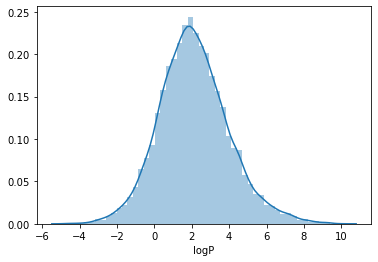

In [12]:
sns.distplot(logp_verified_data.logP)

In [13]:
logp_verified_data.to_csv("../data/3_final_data/logp_mean.csv")